In [57]:
import numpy as np
import pandas as pd

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
iris = pd.read_csv('iris.csv')

In [60]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [62]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [63]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [64]:
iris.drop('Id', axis=1, inplace=True)

In [65]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

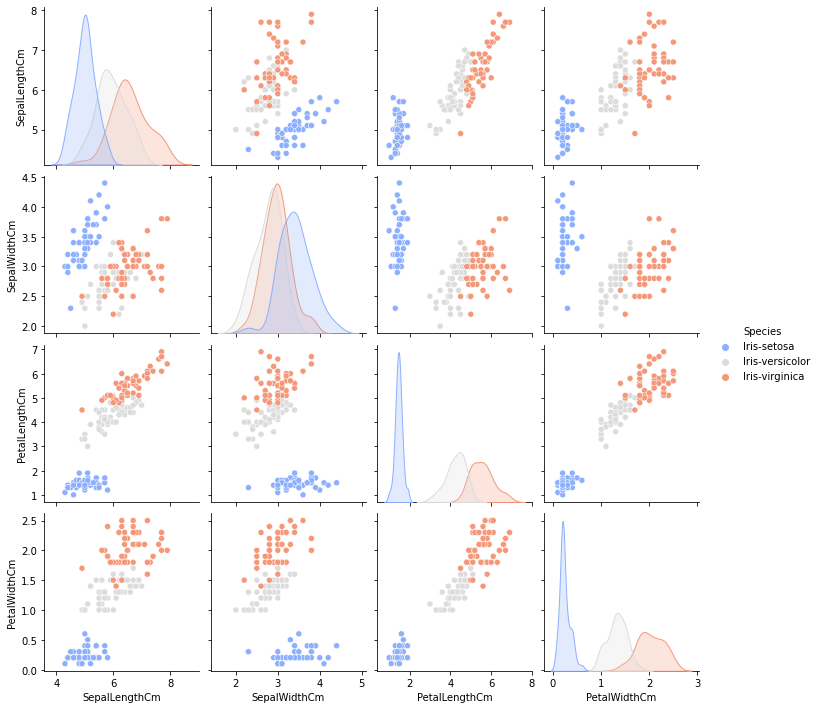

In [66]:
sns.pairplot(iris, hue = 'Species', palette='coolwarm')

In [67]:
def Iris_rename(sp):
    if sp == 'Iris-setosa':
        return 0
    elif sp == 'Iris-versicolor':
        return 1
    else:
        return 2

In [68]:
iris['Species'] = iris['Species'].apply(Iris_rename)

In [69]:
iris.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
58,6.6,2.9,4.6,1.3,1
130,7.4,2.8,6.1,1.9,2
126,6.2,2.8,4.8,1.8,2


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = iris.drop('Species', axis=1)
y = iris['Species']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dtree = DecisionTreeClassifier()

In [75]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
prediction = dtree.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
print(confusion_matrix(y_test, prediction))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [79]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [80]:
data = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':prediction})

In [82]:
data.sample(5)

,Actual Value,Predicted Value
82,1,1
18,0,0
11,0,0
86,1,1
143,2,2


In [84]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

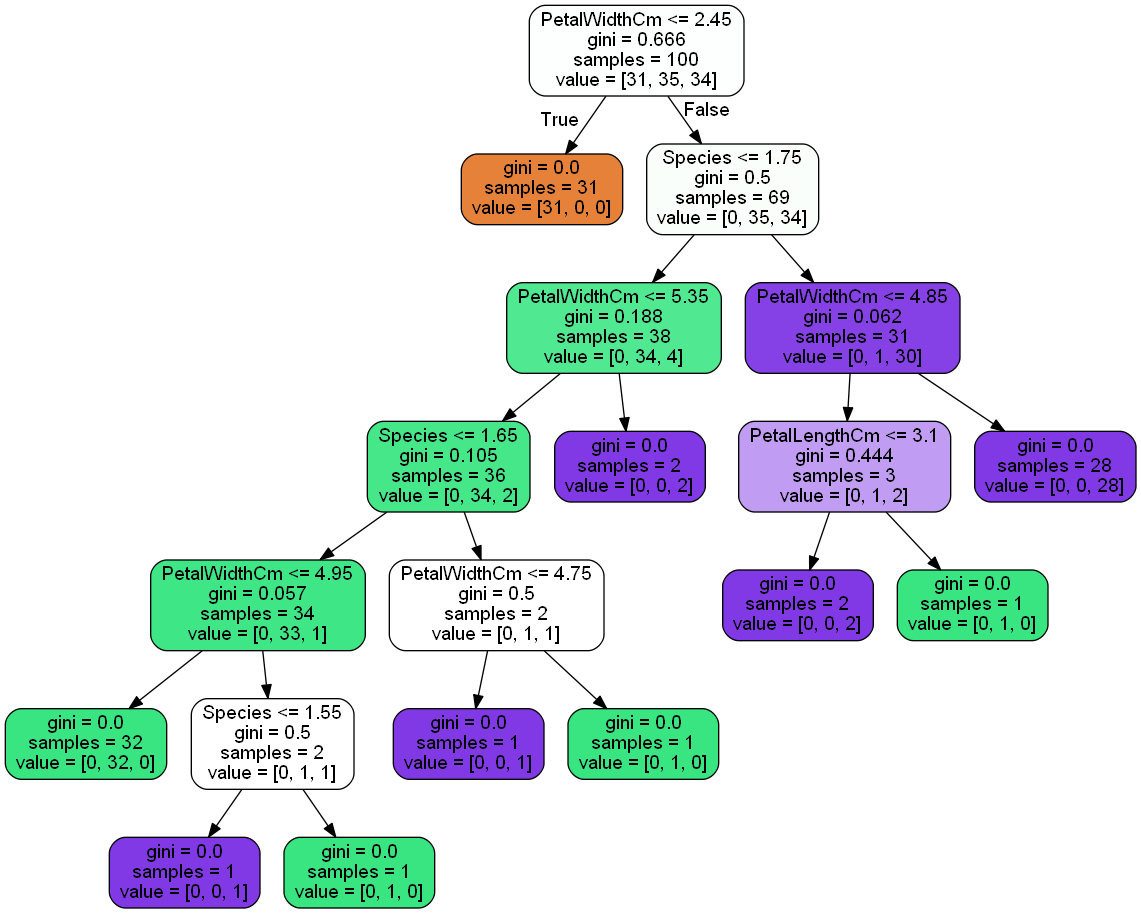

In [98]:
export_graphviz(dtree,
                out_file='descision_tree.dot',
                feature_names=list(iris.columns[1:]),
                rounded=True,
                filled=True  )
(graph,) = pydot.graph_from_dot_file('descision_tree.dot')
graph.write_png('descision_tree.png')
Image('descision_tree.png')

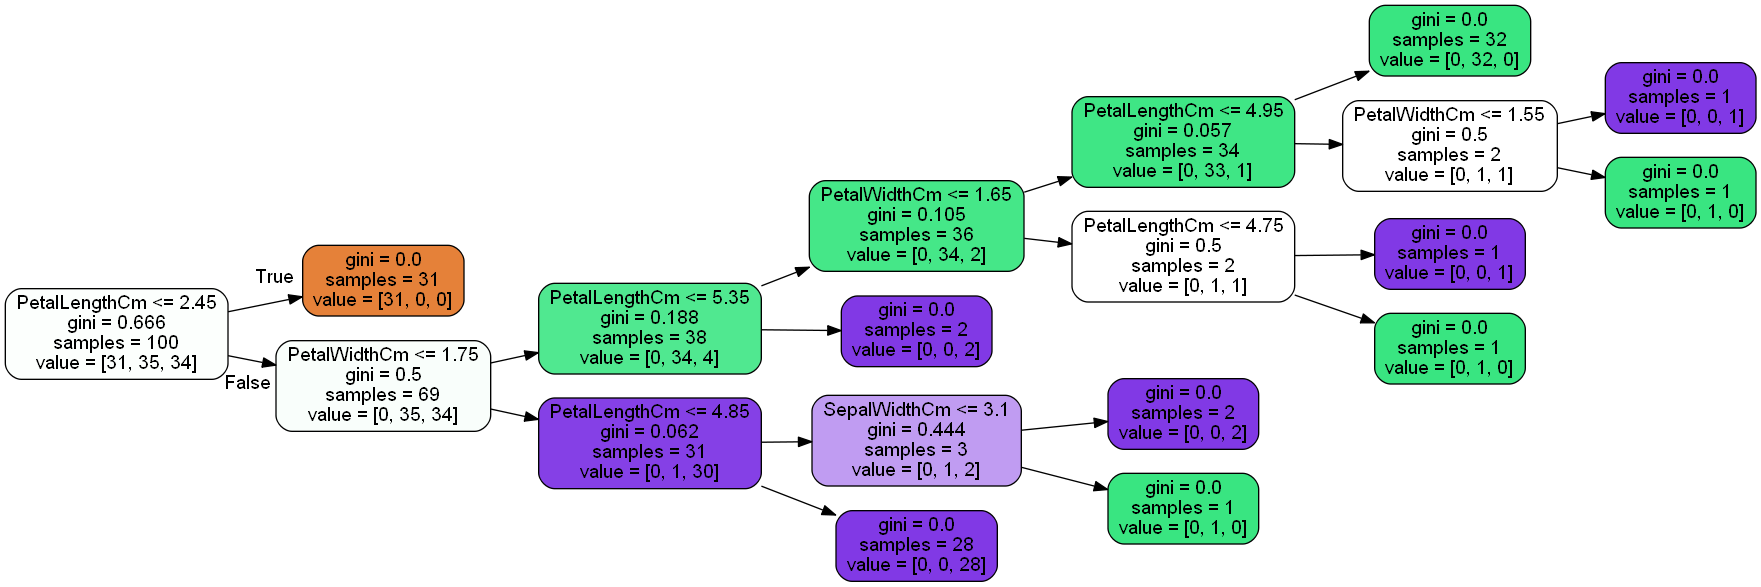

In [101]:
export_graphviz(dtree,
                out_file='decision_tree.dot',
                feature_names=list(iris.columns[:-1]),
                filled=True,
                rounded=True,
                rotate=True)
(graph,) = pydot.graph_from_dot_file('decision_tree.dot')
graph.write_png('decision_tree.png')
Image('decision_tree.png')

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rfc = RandomForestClassifier()

In [104]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [109]:
rfc_predict = rfc.predict(X_test)

In [112]:
data1 = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':rfc_predict})

In [113]:
data1.sample(5)

,Actual Value,Predicted Value
75,1,1
146,2,2
110,2,2
65,1,1
86,1,1


In [114]:
print(confusion_matrix(y_test, rfc_predict))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [115]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

